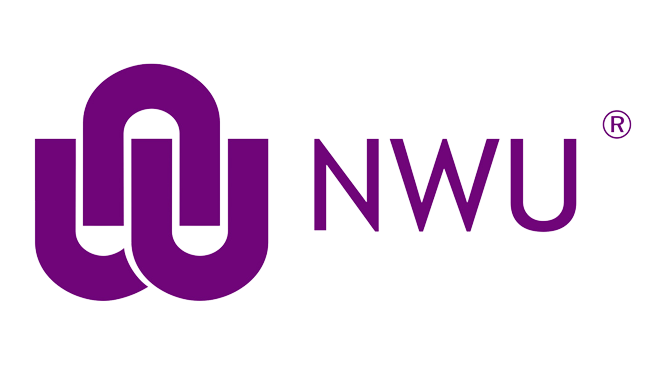

# **CISM 623: Machine Learning**

# **Student Details**

*   # Student Name and Surname: Murendeni Netshianane
*   # University Number: 42618282


# Practical Lab 1

# CLASS: B.Sc Computer Science (HONS)

# DUE DATE: 11/ 08/ 2025 (Monday)


# Instructions: Answer all Questions


# **Problem Statement**
## The world population data spans from 1960 to 2017. We want to develop a prediction model that can provide the most accurate estimation of the current or historical population of a specific nation. Use the two CSV files to answer the questions.

# **Question 1**
## Create a function that accepts a **`country name`** as input and returns a dataframe with the `measured population` and the `year`.

In [13]:
# Import pandas to handle datasets in table format
import pandas as pd

# Load the country information dataset:
# This file contains details about each country, such as its official name,
# country code, region, and possibly other metadata. It serves as the reference
# list for validating country names and linking them to population data.
c_dataframe = pd.read_csv('/content/sample_data/countries.csv')

# Load the world population dataset:
# This file holds population figures for countries over multiple years.
# Each row represents a country, and the columns (after the country identifiers)
# represent specific years with their corresponding population counts.
p_dataframe = pd.read_csv('/content/sample_data/world_population.csv')

In [31]:

# This function is created to return the year and population of a country in that same year
# The year and population will be returned as a data frame
# This function takes the name of the country as an input
def get_year_pop(name_of_country):
    # Try to search for the requested country in the dataset
    # Also change the case to lower case to minimise case sensitivity problems
    req_country = c_dataframe[c_dataframe['Country Name'].str.lower() == name_of_country.lower()]

    # Check whether the country exists, If the country is not found, kindly inform the user to input the correct country
    if req_country.empty:
        print(f" Sorry, we could not find data for '{name_of_country}'. Please check the spelling or try another country.")
        return None

    # Now identify the exact row where to find the country of choice
    # This code will give the index of the row of the sepcified country
    index_of_country = req_country.index

    # Now get the matching population details using the index of the country row we found above
    # Then rearrange the table to make it more readable
    new_p_dataframe = p_dataframe.loc[index_of_country].T.reset_index()

    # Give the columns names that can make the columns easily readable
    new_p_dataframe.columns = ['Year', 'Measured Population']

    # Convert Year values to numbers where possible
    new_p_dataframe['Year'] = pd.to_numeric(new_p_dataframe['Year'], errors='coerce')
    # Convert population values to numbers where possible
    new_p_dataframe['Measured Population'] = pd.to_numeric(new_p_dataframe['Measured Population'], errors='coerce')

    # Confirm the process and share the results
    return new_p_dataframe[['Year', 'Measured Population']]


In [41]:
# Welcome message
print("Welcome! This program is created to help you find the the population of the country of choice from the year 1960 - 2017")
# Input the country name of the country you are looking for
print("\nPlease enter the name of the country you wanna find data on: ")
name_of_country= input()

# Ask user for the country name until a valid string is provided
while True:
    name_of_country = input("\nPlease enter the name of the country you wanna find data on: ").strip()
    if name_of_country == "":
        print("Input cannot be empty. Please enter a valid country name.")
    else:
        break

# Ensure the input is stripped of leading/trailing whitespace
name_of_country = name_of_country.strip()
# Change the name of the country to lower case
lower_name_of_country = name_of_country.lower()

# Inform the user that the program is retrieving the data
print("Retrieving the data for you... ")

# Success message
print(f"Population data for {name_of_country} retrieved successfully!")

# Call the function with the name inputted
get_year_pop(lower_name_of_country)




Welcome! This program is created to help you find the the population of the country of choice from the year 1960 - 2017

Please enter the name of the country you wanna find data on: 


Please enter the name of the country you wanna find data on: 
Input cannot be empty. Please enter a valid country name.

Please enter the name of the country you wanna find data on: Aruba
Retrieving the data for you... 
Population data for Aruba retrieved successfully!


,Year,Measured Population
0,1960,54211.0
1,1961,55438.0
2,1962,56225.0
3,1963,56695.0
4,1964,57032.0
5,1965,57360.0
6,1966,57715.0
7,1967,58055.0
8,1968,58386.0
9,1969,58726.0


# **Question 2**
## We must first divide our data into predictive features (X) and the target (y) before dividing it into training and testing.

## ----------------------------------------------------------------------------------------------------------------------------------------------

## Write a function that will take a dataframe as input `(Question 1)` and return four variables in the form of `(X_train, y_train), (X_test, y_test)` which you will use to train and evaluate your model
## ----------------------------------------------------------------------------------------------------------------------------------------------

## `test_size = 0.2` and `random_state = 42`.

_**Use the results in Question 1 as Inputs:**_
```python
data = get_year_pop('Aruba')
data_split(data)
```
>

In [38]:
# Import train_test_split:
# This function will be used to divide the dataset into a training set and a testing set.
# The training set is used to train the model, and the testing set is used to evaluate its accuracy.
from sklearn.model_selection import train_test_split

def data_split(df_population):
    """
    Splits the population data into training and testing sets.
    X = Year values (independent variable)
    y = Measured Population (dependent variable)
    """

    # Select the independent variable: the year column
    X = df_population[['Year']]

    # Select the dependent variable: the measured population column
    y = df_population['Measured Population']

    # Perform the split: 80% training data, 20% testing data
    # random_state ensures that results can be reproducible
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Return the split datasets
    return X_train, X_test, y_train, y_test


# **Question 3**
## Use the output from `data_split(df)` to fit a Linear regression model

In [39]:
# Import the LinearRegression class to build a predictive model
from sklearn.linear_model import LinearRegression

# Retrieve the population dataset for the selected country
# (Function get_year_pop should return a dataframe with 'Year' and 'Measured Population')
data = get_year_pop(name_of_country)

# Divide the dataset into training and testing portions
x_training_data, x_testing_data, y_training_data, y_testing_data = data_split(data)

# Initialize a Linear Regression model instance
linear_model = LinearRegression()

# Fit (train) the model using the training data
linear_model.fit(x_training_data, y_training_data)



LinearRegression()

# **Question 4**
Test your model using the testing data that was produced in Question 2. To use the `mean square error` as your performance metric.

Write a function that accepts the `model` in Question 3, and the `test data set` in Question 2

In [40]:
# Import the function to calculate Mean Squared Error (MSE) — a measure of prediction accuracy
from sklearn.metrics import mean_squared_error

"""
    This function will Use the trained model to predict values from X_test,
    then after calculating that it will return the Mean Squared Error (MSE)
    which is compared to the actual y_test values.
"""
# Final evaluation function to test the model's performance
def test_model(model, X_test, y_test):
    # Step 1: Generate predictions from the test feature set
    y_prediction = linear_model.predict(x_testing_data)

    # Step 2: Compare predicted values to actual values using MSE
    mse = mean_squared_error(y_testing_data, y_prediction)

    # Step 3: Format and return a clear result message
    value_outputted = f"Mean Squared Error for {name_of_country}: {mse}"
    return value_outputted

# Final call — run the evaluation and display the outcome
print("Model evaluation complete! Here’s the final performance result with mean squared as the metric checked:")
print(test_model(linear_model, x_testing_data, y_testing_data))
print("\nYou have finished your tasks")


Model evaluation complete! Here’s the final performance result with mean squared as the metric checked:
Mean Squared Error for South Africa: 475139159463.61053

You have finished your tasks
